In [187]:
# 1. (L12 – 2 ქულა) გამოიყენეთ ერთ ცვლადიანი რეგრესიის მოდელი (Simple linear Regression). გამოთვალეთ
# მოდელის ეფექტურობა და შეამოწმეთ ახალ მონაცემზე რა შედეგს მოგცემთ.

In [188]:
# შემოვიტანოთ აუცილებელი ბიბლიოთეკები და ჩავტვირთოთ პირველი DataFrame
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# df1 - Student Study Hours.csv - https://www.kaggle.com/datasets/himanshunakrani/student-study-hours
df1 = pd.read_csv('/Student Study Hours.csv')
df1

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


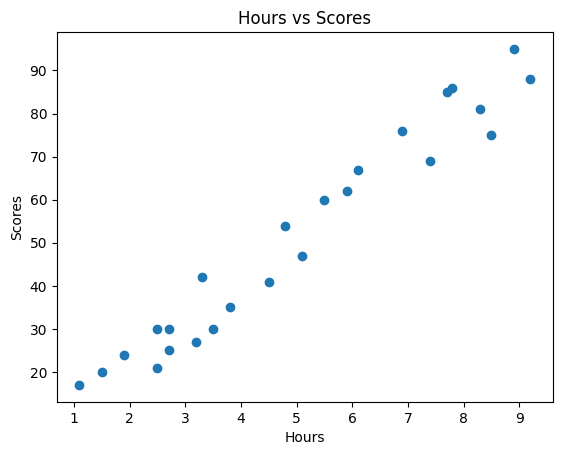

In [189]:
# მონაცემების ვიზუალიზაცია scatter-ის მეშვეობით
plt.scatter(df1['Hours'], df1['Scores'])
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [190]:
# დავყოთთ მონაცემები სატრენინგო და სატესტო ნაწილებად

y = df1['Scores']
X = df1[['Hours']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [191]:
# მოდელის დატრენინგება LinearRegression()-ის გამოყენებით
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [192]:
# coefficient-ის and intercept-ის გამოთვლა
coefficient = regressor.coef_[0]
intercept = regressor.intercept_

print(f"Coefficient: {coefficient}")
print(f"Intercept: {intercept}")

Coefficient: 9.91065648064224
Intercept: 2.018160041434662


In [193]:
# პროგნოზის გაკეთება
y_pred = regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [194]:
# მოდელის შეფასება
r2 = r2_score(y_test, y_pred)

print(f"R^2 Score: {r2}")

R^2 Score: 0.9454906892105354


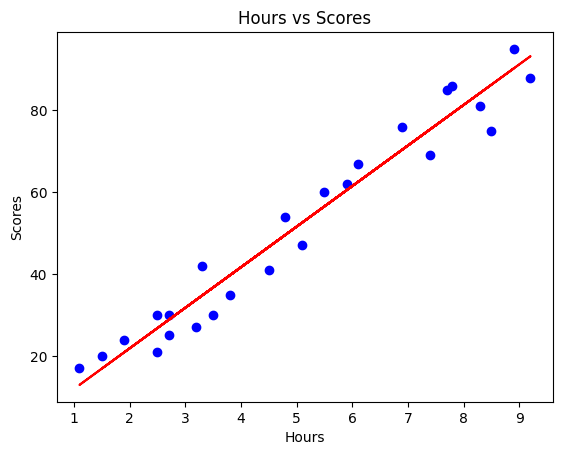

In [195]:
# რეგრესიის ხაზის ვიზუალიზაცია გრაფიკზე
plt.scatter(X, y, color='blue')
plt.plot(X, regressor.predict(X), color='red')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [196]:
# 2. (L12 – 2 ქულა) გამოიყენეთ მრავალ ცვლადიანი რეგრესიის მოდელი (Multiple linear Regression). გამოთვალეთ
# მოდელის ეფექტურობა და შეამოწმეთ ახალ მონაცემზე რა შედეგს მოგცემთ.

In [197]:
# df2 - Real estate.csv - https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction
df2 = pd.read_csv('/Real estate.csv')
df2

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [198]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [199]:
# დავყოთ სვეტები დამოკიდებულ და დამოუკიდებელ ცვლადებად
X = df2.drop(columns=['No', 'Y house price of unit area'])

# სამიზნე სვეტი - 'Y house price of unit area' (Y)
y = df2['Y house price of unit area']

In [200]:
# 80% მონაცემებისა გამოიყენება სატრენინგოდ და 20% კი სატესტოდ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [201]:
# მოდელის დათრენინგება
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [202]:
# coefficients და intercept-ის გამოთვლა
coefficients = regressor.coef_
intercept = regressor.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [ 5.02037302e+00 -2.63132611e-01 -4.46345490e-03  1.09258054e+00
  2.25488903e+02 -6.80648392e+00]
Intercept: -14866.721828564856


In [203]:
# პროგნოზების გაკეთება
y_pred = regressor.predict(X_test)

# მოდელის შეფასება
# R^2 ქულა მიუთითებს იმაზე, თუ რამდენად კარგად პროგნოზირებს მოდელი შედეგს
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

R^2 Score: 0.6573242742217704


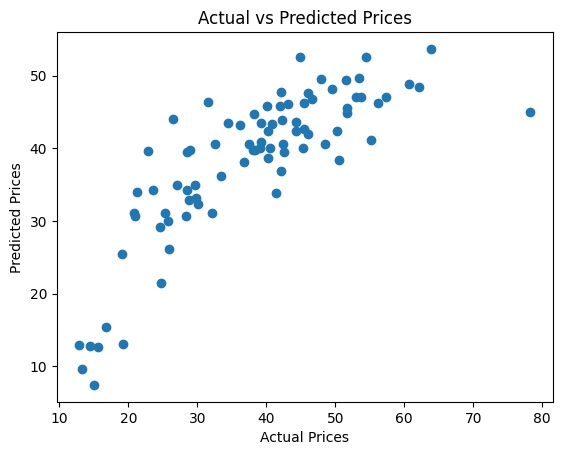

In [204]:
# ვიზუალური შედარება რეალურ და პროგნოზირებულ ფასებს შორის
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

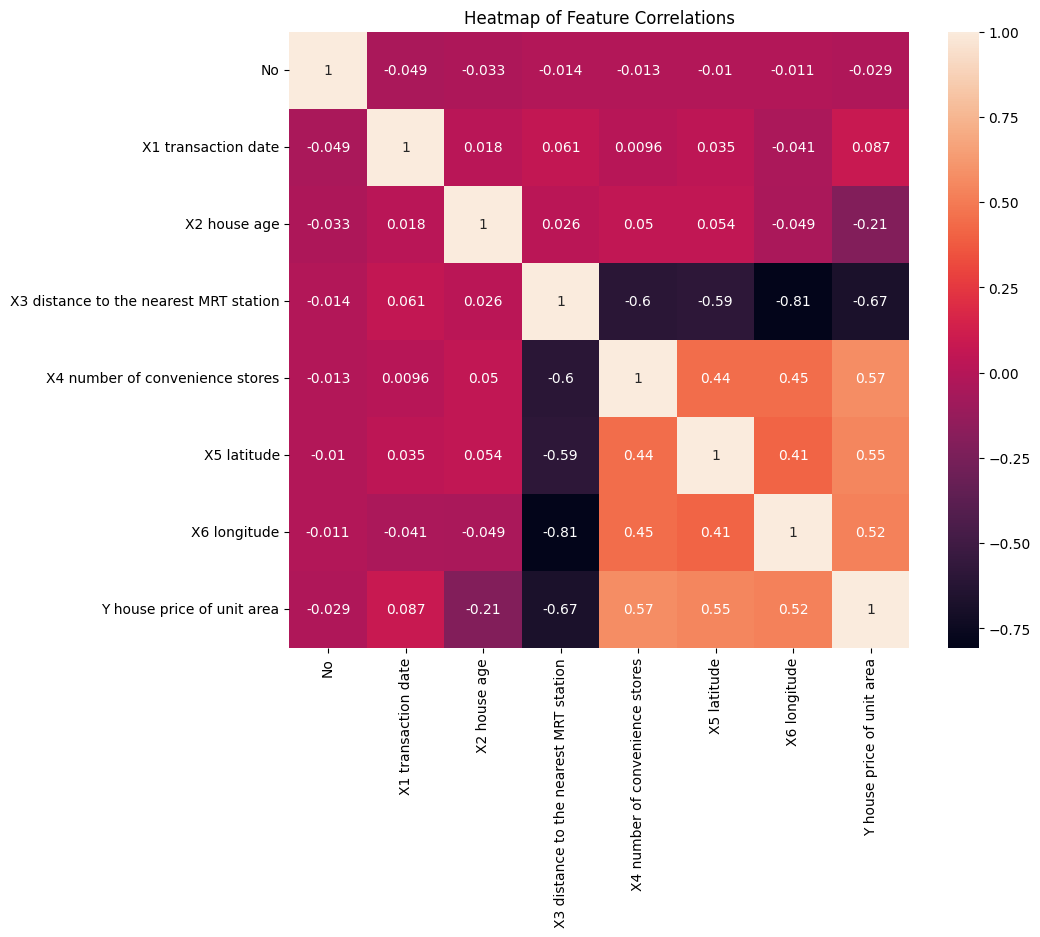

In [205]:
# Heatmap კორელაციების ვიზუალიზაციისათვის
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(), annot=True)
plt.title('Heatmap of Feature Correlations')
plt.show()

In [206]:
# 3. (L13 – 3 ქულა) გამოიყენეთ გადაწყვეტილების ხის რეგრესიის მოდელი ერთ ცვლადზე ან რამდენიმე ცვლადზე
# დამოკიდებულებით. გამოთვალეთ მოდელის ეფექტურობა და შეამოწმეთ ახალ მონაცემზე რა შედეგს
# მოგცემთ.

In [207]:
# df3 - cardekho_data.csv - https://raw.githubusercontent.com/RimjimRazdan/cars_price_prediction/master/car%20data.csv
df3 = pd.read_csv('/cardekho_data.csv')
df3

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [208]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [209]:
# საჭირო ბიბლიოთეკებისა და ფუნქციების იმპორტი
from sklearn.tree import DecisionTreeRegressor, export_graphviz, plot_tree
from sklearn.preprocessing import LabelEncoder

In [210]:
# მონაცემების დამუშავება/მომზზადება
# კატეგორიული მნიშვნელობების ენქოდინგი LabelEncoder-ის დახმარებით
label_encoder = LabelEncoder()
df3['Fuel_Type'] = label_encoder.fit_transform(df3['Fuel_Type'])
df3['Seller_Type'] = label_encoder.fit_transform(df3['Seller_Type'])
df3['Transmission'] = label_encoder.fit_transform(df3['Transmission'])

In [211]:
df3.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [212]:
# მონაცემების დაყოფა სატრენონგოდ და სატესტოდ

y = df3['Selling_Price']
X = df3.drop(columns=['Car_Name', 'Selling_Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [213]:
# Train the decision tree regression model
# DecisionTreeRegressor მოდელის შექმან და დატრენინგება შესაბამის სატრენინგო მონაცემებზე
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [214]:
# უკვე დატრენინგებული მოდელის გამოყენება ფასის პროგნოზირებისათვის
y_pred = regressor.predict(X_test)

In [215]:
# მოდელის შემოწმება
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

R^2 Score: 0.9458666512496163


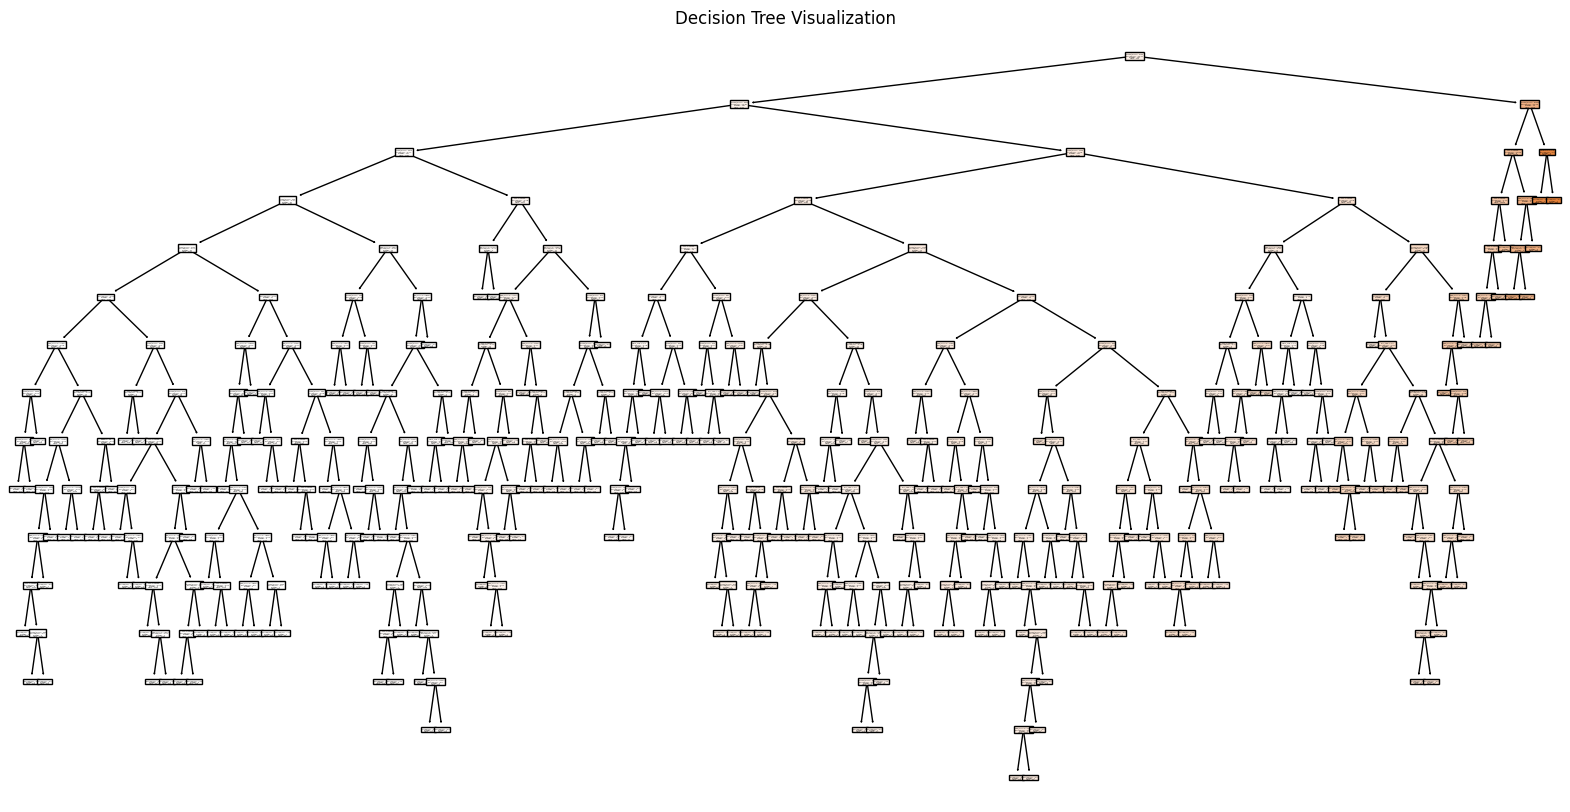

In [216]:
# გადაწყვეტილების ხის ვიზუალიზაცია
plt.figure(figsize=(20, 10))
plot_tree(regressor, feature_names=X.columns, filled=True)
plt.title('Decision Tree Visualization')
plt.show()

In [217]:
# გადაწყვეტილების ხის .dot ფაილად ექსპორტირება უკეთესად აღსაქმელად (http://www.webgraphviz.com/)
export_graphviz(regressor, out_file='decision_tree.dot', feature_names=X.columns, filled=True)

In [218]:
# 4. (L14 – 3 ქულა) გამოიყენეთ ლოგისტიკური რეგრესიის მოდელი. გამოთვალეთ მოდელის ეფექტურობა და
# შეამოწმეთ ახალ მონაცემზე რა შედეგს მოგცემთ.

In [219]:
# df4 - framingham - logistic to predict heart disease.csv - https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression
df4 = pd.read_csv('/framingham - logistic to predict heart disease.csv').head(1000)
df4

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,47,2.0,1,9.0,0.0,0,0,0,201.0,122.0,67.0,20.12,68.0,NaN,0
996,1,49,1.0,1,30.0,0.0,0,0,0,199.0,107.5,71.0,26.62,70.0,68.0,0
997,0,55,3.0,0,0.0,0.0,0,0,0,255.0,125.0,85.0,22.89,65.0,81.0,0
998,0,57,1.0,0,0.0,NaN,0,0,0,372.0,122.0,80.0,21.02,65.0,81.0,0


In [220]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             1000 non-null   int64  
 1   age              1000 non-null   int64  
 2   education        975 non-null    float64
 3   currentSmoker    1000 non-null   int64  
 4   cigsPerDay       998 non-null    float64
 5   BPMeds           989 non-null    float64
 6   prevalentStroke  1000 non-null   int64  
 7   prevalentHyp     1000 non-null   int64  
 8   diabetes         1000 non-null   int64  
 9   totChol          988 non-null    float64
 10  sysBP            1000 non-null   float64
 11  diaBP            1000 non-null   float64
 12  BMI              997 non-null    float64
 13  heartRate        999 non-null    float64
 14  glucose          911 non-null    float64
 15  TenYearCHD       1000 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 125.1 KB


In [221]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [222]:
# შევავსოთ გამოტოვებული მნიშვნელობები მედიანით
df4 = df4.fillna(df4.median())

In [223]:
y = df4['TenYearCHD']
X = df4.drop(columns=['TenYearCHD'])

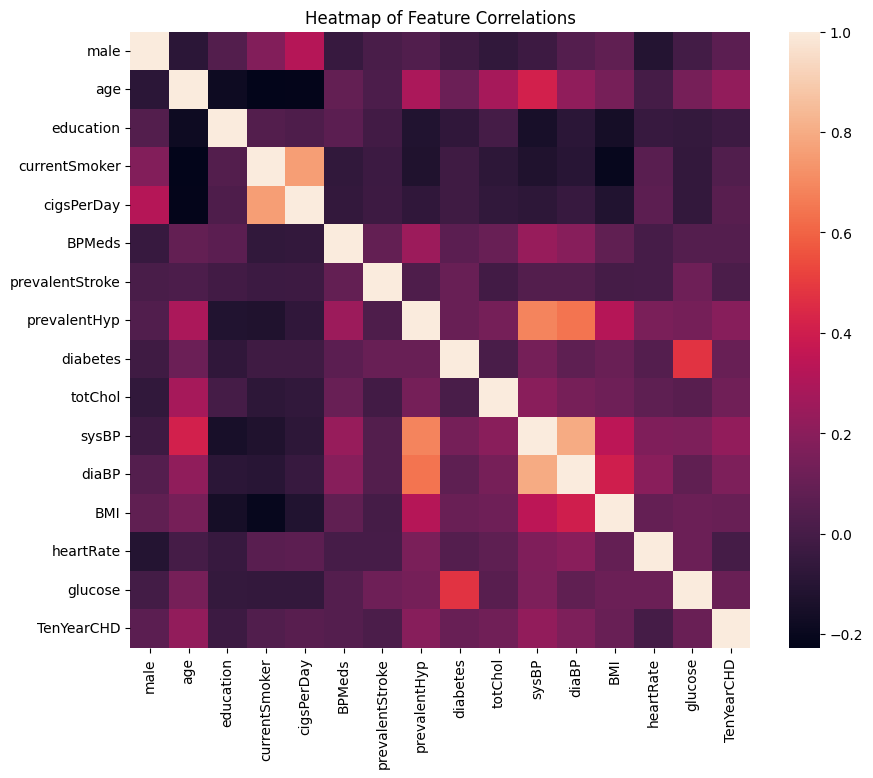

In [224]:
# Heatmap კორელაციების ვიზუალიზაციისათვის
plt.figure(figsize=(10, 8))
sns.heatmap(df4.corr())
plt.title('Heatmap of Feature Correlations')
plt.show()

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# ლოგისტიკური რეგრესიის მოდელის დათრენინგება
logistic_regressor = LogisticRegression(max_iter=1000)
logistic_regressor.fit(X_train, y_train)

In [227]:
# პროგნოზის გაკეთება
y_pred = logistic_regressor.predict(X_test)

In [228]:
# მოდელის შეფასება, სიზუსტის ქულა
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.855


In [229]:
# კლასიფიკაციის რეპორტი უფრო დაწვრილებით
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       170
           1       0.57      0.13      0.22        30

    accuracy                           0.85       200
   macro avg       0.72      0.56      0.57       200
weighted avg       0.82      0.85      0.81       200



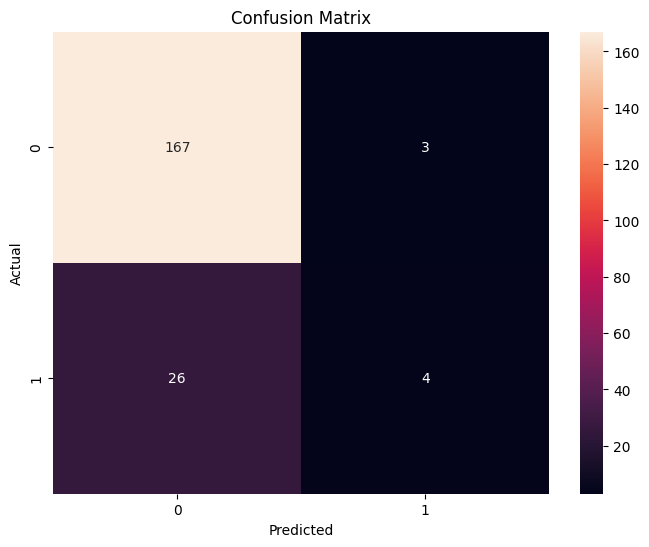

In [230]:
# Confusion Matrix უკეთესი ვიზუალიზაციისთვის
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [231]:
# 5. (L13 – 4 ქულა) გამოიყენეთ გადაწყვეტილების ხის კლასიფიკაციის მოდელი ერთ ცვლადზე ან რამდენიმე
# ცვლადზე დამოკიდებულებით. გამოთვალეთ მოდელის ეფექტურობა და შეამოწმეთ ახალ მონაცემზე რა
# შედეგს მოგცემთ.

In [232]:
from sklearn.tree import DecisionTreeClassifier

In [233]:
# გადაწყვეტილების ხის კლასიფიკაციის მოდელიის ასაგებად გამოვიყენოთ ისევ df4
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [234]:
# პროგნოზის გაკეთება და სიზუსტის ქულის გამოთვლა
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.795


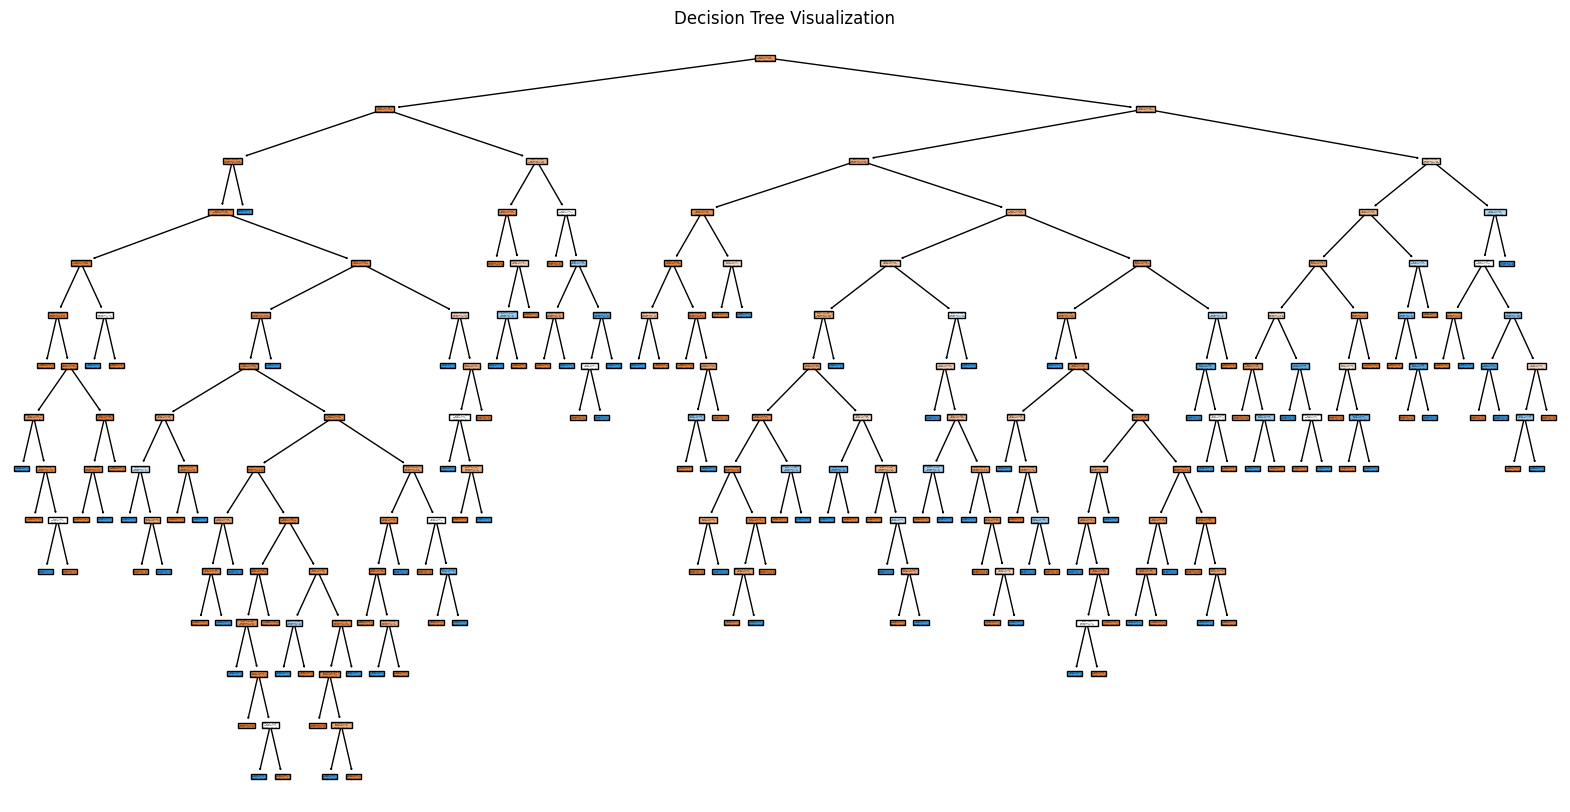

In [235]:
# გადაწყვეტილების ხის ვიზუალიზაცია
plt.figure(figsize=(20, 10))
plot_tree(classifier, feature_names=X.columns, filled=True)
plt.title('Decision Tree Visualization')
plt.show()

In [236]:
# გადაწყვეტილების ხის .dot ფორმატად ექსპორტი და შენახვა
export_graphviz(classifier, out_file='decisiontree2.dot', feature_names=X.columns, filled=True)